#  1st Problem -- Kernal PCA 

In [2]:
#Importing Libraries 
import pandas as pd                 
import numpy as np 
from pandas import DataFrame
from numpy.linalg import eig
from numpy.linalg import eigh
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#Reading the dataset and renaming the coloumns
dc = pd.read_csv('Dataset.csv', header = None)
df = pd.DataFrame(dc)
df = df.rename(columns={0: 'f1', 1: 'f2'})

In [3]:
# Computing the Covariance Matrix [C = (1/n)*x_t*x)] 
x=df.values
x_t = x.T
x_c = x - np.mean(x,axis=0)
x_ct=x_c.T
C_u = (1/1000)*np.matmul(x_t,x)     # Covariance Matrix for Uncentered Data
C_c = (1/1000)*np.matmul(x_ct,x_c)  # Covariance Matrix for Centered Data
print("The Covariance Matrix of the Uncentered dataset is \n{}\n".format(C_u))
print("The Covariance Matrix of the Centered dataset is \n{}".format(C_c))

The Covariance Matrix of the Uncentered dataset is 
[[14.76615576  0.80885904]
 [ 0.80885904 16.85536339]]

The Covariance Matrix of the Centered dataset is 
[[14.76615576  0.80885904]
 [ 0.80885904 16.85536339]]


In [4]:
# Function to calculate Eigen values,Eigen vectors and sorting them by taking Covaraince Matrix as input
def sorted_eig(cov_mat):  
    eigen_values, eigen_vectors = eig(cov_mat)
    index = eigen_values.argsort()[::-1]   
    eigen_values = eigen_values[index]
    eigen_vectors = eigen_vectors[:,index]
    return eigen_values, eigen_vectors

# 1a PCA for Centerd Data

In [5]:
eigen_values, eigen_vectors = sorted_eig(C_c)
total_eigen_values = sum(eigen_values)
v1 = (1/1000)*((x_c@eigen_vectors[0]).transpose())@(x_c@eigen_vectors[0])
v2 = (1/1000)*((x_c@eigen_vectors[1]).transpose())@(x_c@eigen_vectors[1])

print("The Eigen Values of the Centered dataset are \n{} \n{} \n".format(eigen_values[0],eigen_values[1]))
print("The Eigen Vectors of the Centered dataset are \n{} \n{} \n".format(eigen_vectors[0],eigen_vectors[1]))
print("The Variance of Prinicple Component 1 in Centered dataset is {}".format(v1))
print("The Variance of Prinicple Component 2 in Centered dataset is {}".format(v2))
print("The % of Variance explanied by Prinicple Component 1 in Centered dataset is {}".format(v1*100/(v1+ v2)))
print("The % of Variance explanied by Prinicple Component 2 in Centered dataset is {}".format(v2*100/(v1+ v2)))

The Eigen Values of the Centered dataset are 
17.131914402444366 
14.489604749330637 

The Eigen Vectors of the Centered dataset are 
[-0.323516  -0.9462227] 
[-0.9462227  0.323516 ] 

The Variance of Prinicple Component 1 in Centered dataset is 17.131914402444366
The Variance of Prinicple Component 2 in Centered dataset is 14.489604749330638
The % of Variance explanied by Prinicple Component 1 in Centered dataset is 54.17802452885223
The % of Variance explanied by Prinicple Component 2 in Centered dataset is 45.82197547114777


# 1b PCA for Uncenterd Data

In [6]:
eigen_values_u, eigen_vectors_u = sorted_eig(C_u)
total_eigen_values_u = sum(eigen_values_u)
v_1 = (1/1000)*((x@eigen_vectors[0]).transpose())@(x@eigen_vectors[0])
v_2 = (1/1000)*((x@eigen_vectors[1]).transpose())@(x@eigen_vectors[1])

print("The Eigen Values of the Uncentered dataset are \n{} \n{} \n".format(eigen_values_u[0],eigen_values_u[1]))
print("The Eigen Vectors of the Uncentered dataset are \n{} \n{} \n".format(eigen_vectors_u[0],eigen_vectors_u[1]))
print("The Variance of Prinicple Component 1 in Uncentered dataset is {}".format(v_1))
print("The Variance of Prinicple Component 2 in Uncentered dataset is {}".format(v_2))
print("The % of Variance explanied by Prinicple Component 1 in Uncentered dataset is {}".format(v_1*100/(v_1+ v_2)))
print("The % of Variance explanied by Prinicple Component 2 in Uncentered dataset is {}".format(v_2*100/(v_1+ v_2)))

The Eigen Values of the Uncentered dataset are 
17.131914402444487 
14.489604749330738 

The Eigen Vectors of the Uncentered dataset are 
[-0.323516  -0.9462227] 
[-0.9462227  0.323516 ] 

The Variance of Prinicple Component 1 in Uncentered dataset is 17.131914402444483
The Variance of Prinicple Component 2 in Uncentered dataset is 14.489604749330738
The % of Variance explanied by Prinicple Component 1 in Uncentered dataset is 54.17802452885223
The % of Variance explanied by Prinicple Component 2 in Uncentered dataset is 45.82197547114777


# 1c Kernal PCA

Text(0.5, 1.0, 'Projection on Principle Components')

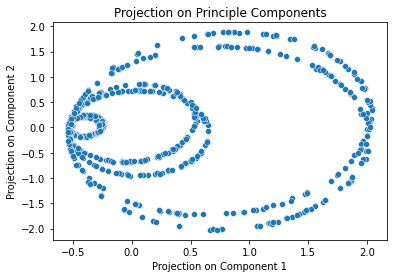

In [7]:
#Projection on Principle Components for Kernal PCA: k(x,y) = (1+xt*y)^2
K=np.empty([1000,1000])
for i in range(0,1000):
    for j in range(i,1000):
        k = (1+x[i]@x[j])**2
        K[i][j] = k
        K[j][i] = k  
        
one=(1/1000)*np.ones([1000,1000])
k_centered = K - one@K - K@one + one@K@one
eigen_values_d2, eigen_vectors_d2 = sorted_eig(k_centered)
eigen_values_d2 = eigen_values_d2.real
eigen_vectors_d2 = eigen_vectors_d2.real
one.fill(0)
for i in range(1000):
    one[:,i] = eigen_vectors_d2[:,i]/np.power(1000*abs(eigen_values_d2[i]),(1/2))
kd2=np.matmul(k_centered,one)
sns.scatterplot(kd2[:,0],kd2[:,1])
plt.xlabel('Projection on Component 1')
plt.ylabel('Projection on Component 2')
plt.title('Projection on Principle Components')

Text(0.5, 1.0, 'Projection on Principle Components')

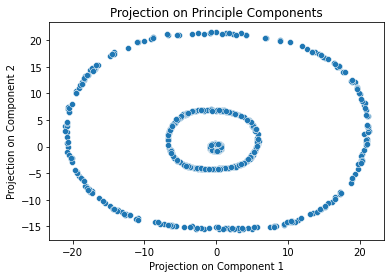

In [8]:
#Projection on Principle Components for Kernal PCA: k(x,y) = (1+xt*y)^3
K3=np.empty([1000,1000])
for i in range(0,1000):
    for j in range(i,1000):
        k_3 = (1+x[i]@x[j])**3
        K3[i][j] = k_3
        K3[j][i] = k_3
        
one=(1/1000)*np.ones([1000,1000])
k_centered_d3= K3 - one@K - K@one + one@K@one
eigen_values_d3, eigen_vectors_d3 = sorted_eig(k_centered_d3)
eigen_values_d3=eigen_values_d3.real
eigen_vectors_d3=eigen_vectors_d3.real
one.fill(0)
for i in range(1000):
    one[:,i] = eigen_vectors_d3[:,i]/np.power(1000*abs(eigen_values_d3[i]),(1/2))
kd3=np.matmul(k_centered_d3,one)
sns.scatterplot(kd3[:,0],kd3[:,1])
plt.xlabel('Projection on Component 1')
plt.ylabel('Projection on Component 2')
plt.title('Projection on Principle Components')

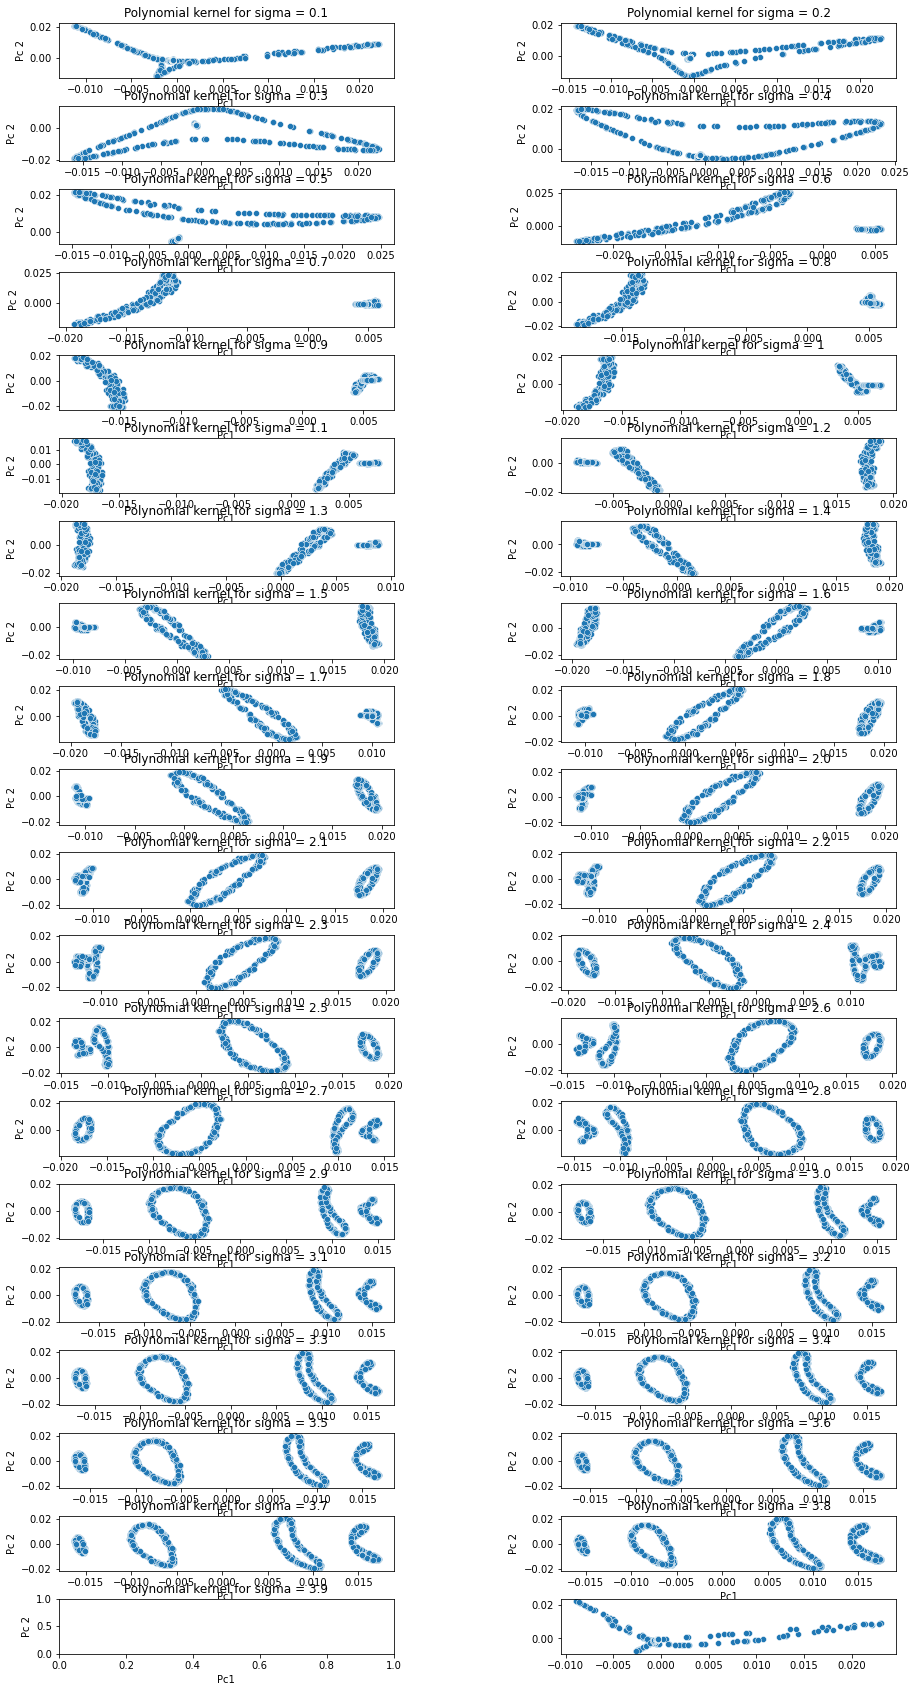

In [23]:
#Kernal PCA: sigma = {0.1, 0.2, . . . , 4}
fig, axes = plt.subplots(20, 2, figsize=(15,30))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
sigma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,
         2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0]

for k in range(1,len(sigma)):
    K_n=np.empty([1000,1000])
    for i in range(0,1000):
        for j in range(i,1000):
            k_new=math.exp(-(np.matmul((x_t[:,i]-x_t[:,j]),(x_t[:,i]-x_t[:,j])))/(2*sigma[k-1]*sigma[k-1]))
            K_n[i][j] = k_new
            K_n[j][i] = k_new

    one=(1/1000)*np.ones([1000,1000])
    k_centered_n= K_n - one@K_n - K_n@one + one@K_n@one
    eigen_values_n, eigen_vectors_n = sorted_eig(k_centered_n)
    eigen_values_n=eigen_values_n.real
    eigen_vectors_n=eigen_vectors_n.real
    one.fill(0)
    for i in range(1000):
        one[:,i] = eigen_vectors_n[:,i]/np.power(1000*abs(eigen_values_n[i]),(1/2))
    kn=np.matmul(k_centered_n,one)
    sns.scatterplot(kn[:,0],kn[:,1])
    plt.subplot(20,2,k)          
    plt.xlabel('Pc1')
    plt.ylabel('Pc 2')
    plt.title("Polynomial kernel for sigma = "+str(sigma[k-1]));    